In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
df.columns = df.columns.str.strip()

In [7]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,61
Number of observations,39644
Total Missing (%),0.0%
Total size in memory,18.5 MiB
Average record size in memory,488.0 B
Numeric,43
Categorical,0
Boolean,14
Date,0
Text (Unique),1
Rejected,3


### Firstly, we need to determine the appropriate threshold for number of shares to discriminate the news to be popular or unpopular. So we  found the median of the target attribute "shares" above which  is 1,400, thus it is reasonable if  we take 1,400 as a threshold. Then we can use this threshold to convert the continuous number target attribute into a  boolean label.

In [5]:
df.shares.median()

1400.0

In [6]:
df1 = df

In [8]:
# Get the features from dataset
df1 = df1.drop("url",axis=1)
df1 = df1.drop("timedelta",axis= 1)
df1 = df1.drop("kw_avg_min",axis= 1)
df1 = df1.drop("n_non_stop_unique_tokens",axis= 1)
df1 = df1.drop("n_non_stop_words",axis= 1)

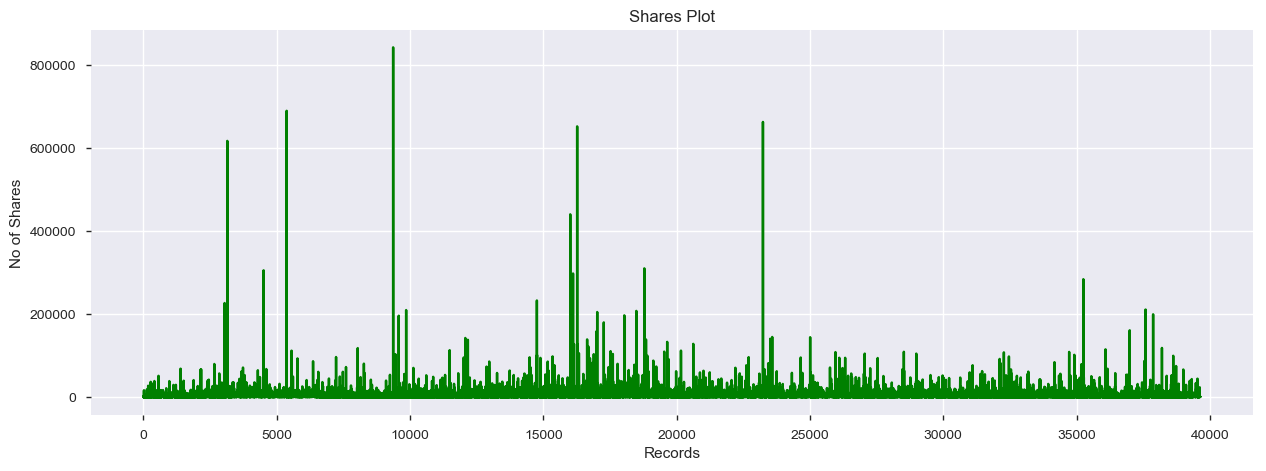

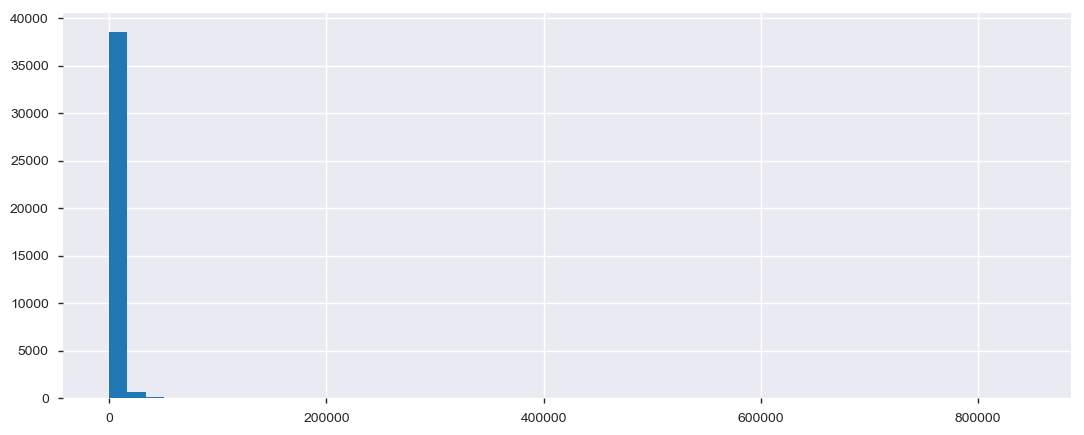

In [9]:
pl.figure(figsize=(15,5))
pl.plot(df.shares,color='g')
pl.xlabel('Records')
pl.ylabel('No of Shares')
pl.title('Shares Plot')
pl.show()

pl.figure(figsize=(13,5))
df1.shares.hist(bins=50)

In [10]:
# handle goal attrubte to binary
popular = df.shares >= 1400
unpopular = df.shares < 1400

df1.loc[popular,'shares'] = 1
df1.loc[unpopular,'shares'] = 0

In [11]:
df.to_csv("modified.csv")

In [12]:
# Get the features from dataset
df = df.drop("url",axis=1)
df = df.drop("timedelta",axis= 1)
df = df.drop("kw_avg_min",axis= 1)
df = df.drop("n_non_stop_unique_tokens",axis= 1)
df = df.drop("n_non_stop_words",axis= 1)

In [13]:
df["shares"] = np.log(df["shares"])
df["n_unique_tokens"] = np.cbrt(df["n_unique_tokens"])
df["self_reference_min_shares"] = np.cbrt(df["self_reference_min_shares"])
df["kw_max_min"] = np.cbrt(df["kw_max_min"])

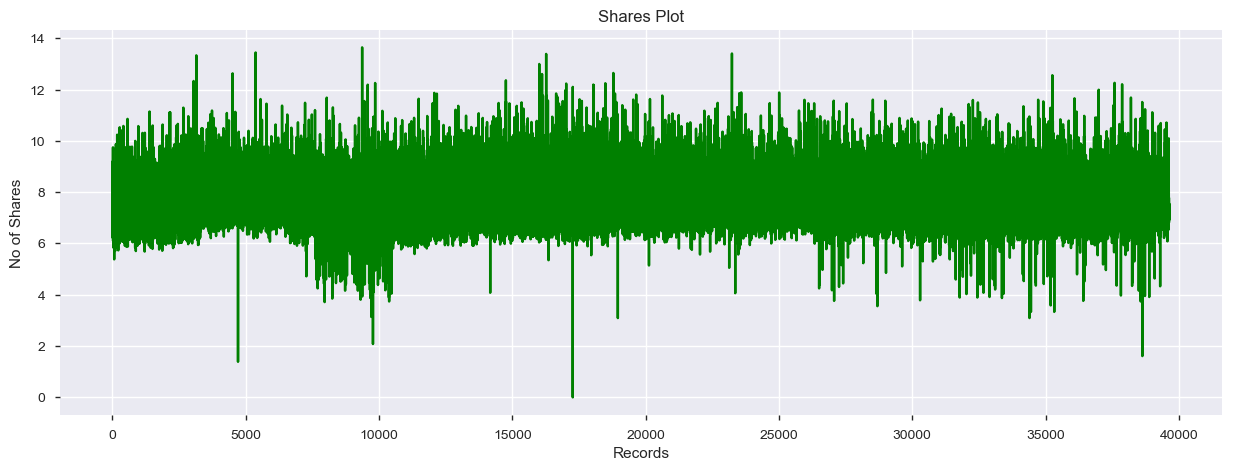

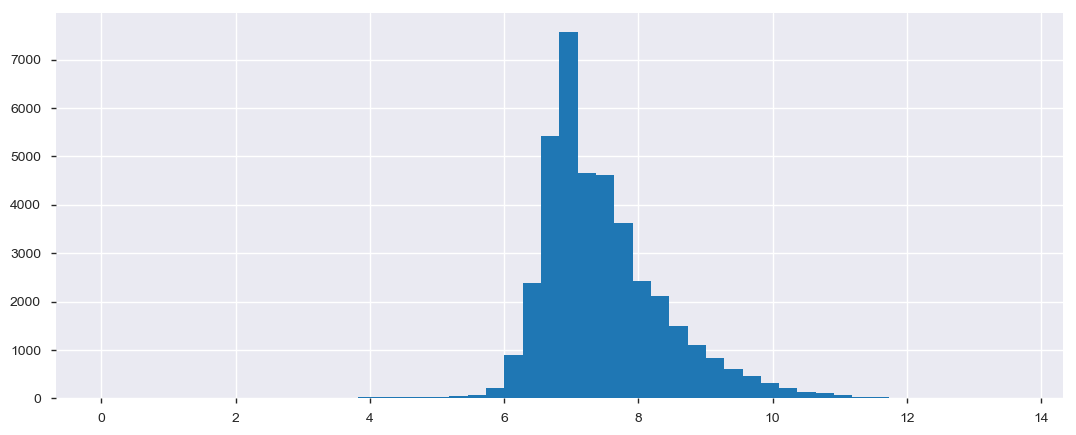

In [14]:
pl.figure(figsize=(15,5))
pl.plot(df.shares,color='g')
pl.xlabel('Records')
pl.ylabel('No of Shares')
pl.title('Shares Plot')
pl.show()

pl.figure(figsize=(13,5))
df.shares.hist(bins=50)

In [15]:
# handle goal attrubte to binary
popular = df.shares >= 7.24
unpopular = df.shares < 7.24

df.loc[popular,'shares'] = 1
df.loc[unpopular,'shares'] = 0

In [16]:
df.to_csv('normalized.csv', index = False)